## Environment Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import json
import os

sns.set(style="whitegrid")
%matplotlib inline

# Define paths (adjustable if directory changes)
BASE_DIR = "../output"
RECURSIVE_LOG_PATH = os.path.join(BASE_DIR, "recursive_chunk_log.json")
CHUNK_ANALYSIS_PATH = os.path.join(BASE_DIR, "chunk_analysis.json")
CHUNK_ANALYSIS_RECURSIVE_PATH = os.path.join(BASE_DIR, "chunk_analysis_recursive.json")
QA_LOG_PATH = os.path.join(BASE_DIR, "rag_qa_logs.jsonl")

### Load Logs & Parse

In [3]:
# 2. Load recursive chunk logs
with open(RECURSIVE_LOG_PATH, 'r', encoding='utf-8') as f:
    recursive_chunks = json.load(f)

print(f" Loaded {len(recursive_chunks)} chunks from RecursiveCharacterTextSplitter")
print("Sample keys from one chunk:")
print(recursive_chunks[0].keys())


 Loaded 48495 chunks from RecursiveCharacterTextSplitter
Sample keys from one chunk:
dict_keys(['chunk_id', 'file', 'tokens', 'length', 'source'])


### Chunk Size Distribution	Histogram + KDE for each method

In [4]:
# Cell 3: Load token and chunk statistics
with open(CHUNK_ANALYSIS_PATH, 'r', encoding='utf-8') as f:
    chunk_stats = json.load(f)

# Convert to DataFrame for analysis
print("Available columns in chunk_df:")


chunk_df = pd.DataFrame(chunk_stats)
print(chunk_df.columns.tolist())
chunk_df.head()

Available columns in chunk_df:
['file_name', 'file_type', 'source', 'chunk_id', 'num_tokens', 'truncated']


,file_name,file_type,source,chunk_id,num_tokens,truncated
0,2024-2025 Academic Calendar by Semester.pdf,.pdf,../data/raw/Department of Data Science\2024-20...,0,378,False
1,2024-2025 Academic Calendar by Semester.pdf,.pdf,../data/raw/Department of Data Science\2024-20...,1,478,False
2,2024-2025 Academic Calendar by Semester.pdf,.pdf,../data/raw/Department of Data Science\2024-20...,2,253,False
3,2024-2025 Academic Calendar by Semester.pdf,.pdf,../data/raw/Department of Data Science\2024-20...,3,489,False
4,2024-2025 Academic Calendar by Semester.pdf,.pdf,../data/raw/Department of Data Science\2024-20...,4,325,False


## Data Visualization

### Plot Chunk Size Distribution

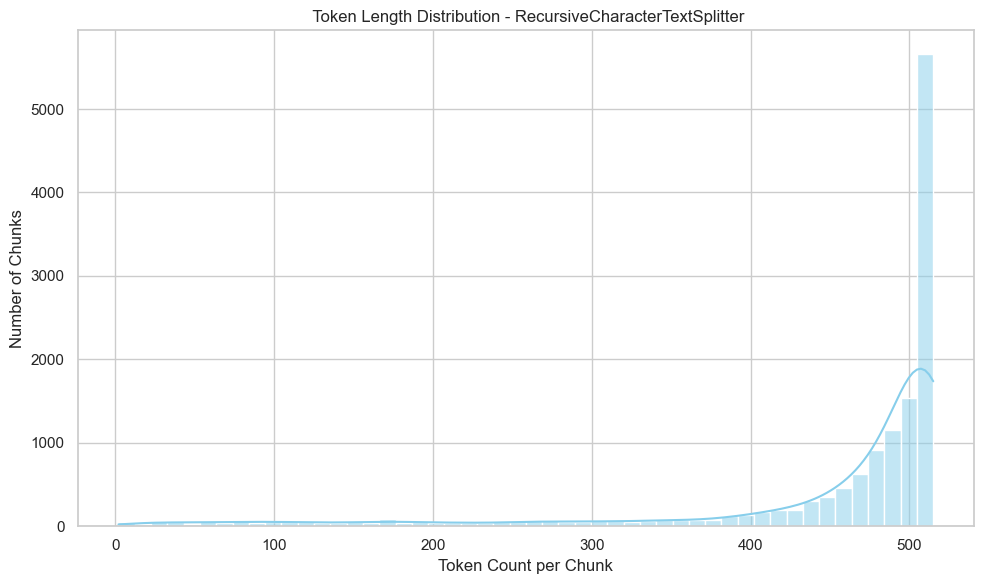

In [5]:
# Cell 4 (Updated): Token count distribution
plt.figure(figsize=(10, 6))
sns.histplot(chunk_df['num_tokens'], bins=50, kde=True, color='skyblue')
plt.title(" Token Length Distribution - RecursiveCharacterTextSplitter")
plt.xlabel("Token Count per Chunk")
plt.ylabel("Number of Chunks")
plt.grid(True)
plt.tight_layout()
plt.show()


### Chunk Count per File Visualization

In [6]:
# Recreate chunk_counts if it was lost after kernel reset
chunk_counts = chunk_df['file_name'].value_counts().reset_index()
chunk_counts.columns = ['file_name', 'chunk_count']


C:\Users\chand\AppData\Local\Temp\ipykernel_27340\374666219.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='file_name', x='chunk_count', data=top_files, palette='mako')
C:\Users\chand\AppData\Local\Temp\ipykernel_27340\374666219.py:10: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
d:\#Code\VS Code\ASKME\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


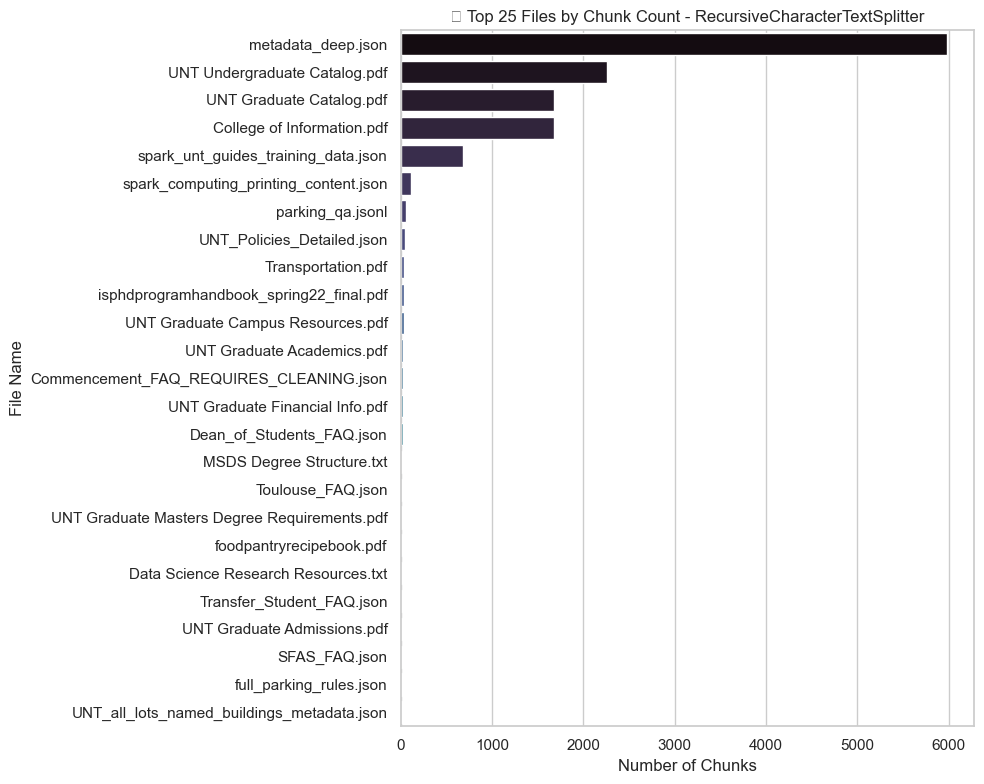

In [7]:
# Sort by chunk count for clarity
top_files = chunk_counts.sort_values(by="chunk_count", ascending=False).head(25)

# Horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(y='file_name', x='chunk_count', data=top_files, palette='mako')
plt.title("📦 Top 25 Files by Chunk Count - RecursiveCharacterTextSplitter")
plt.xlabel("Number of Chunks")
plt.ylabel("File Name")
plt.tight_layout()
plt.show()


In [8]:
import plotly.express as px

fig = px.treemap(
    chunk_counts,
    path=['file_name'],
    values='chunk_count',
    title='📦 Treemap of Chunk Counts per File',
    color='chunk_count',
    color_continuous_scale='Aggrnyl'
)
fig.show()



### Load rag_qa_logs.jsonl

In [9]:
# Load QA reranker logs
QA_LOG_PATH = os.path.join(BASE_DIR, "rag_qa_logs.jsonl")

qa_logs = []
with open(QA_LOG_PATH, "r", encoding="utf-8") as f:
    for line in f:
        qa_logs.append(json.loads(line.strip()))

print(f" Loaded {len(qa_logs)} QA entries from reranker log")
print("Sample keys:", qa_logs[0].keys())

# Convert to DataFrame for analysis
qa_df = pd.DataFrame(qa_logs)
qa_df.head()


 Loaded 3 QA entries from reranker log
Sample keys: dict_keys(['timestamp', 'question', 'answer', 'chunks'])


,timestamp,question,answer,chunks
0,2025-04-21T02:20:21.123196,I have work at chestnut hall. Best place to pa...,The best place to park your car when you have ...,[of Ave. D and Chestnut Street.\n1800 Chestnut...
1,2025-04-21T02:26:07.017455,Would you suggest me the professsor with intre...,"I'm sorry, but the provided context does not c...",[Students should meet with an advisor in the O...
2,2025-04-21T02:27:05.451216,Suggest me a Data Sceince professor working on...,"Based on the context provided, there isn't a s...","[for Analytics"", ""INFO 5709 - Data Visualizati..."


###  Visualize Number of Chunks per Question

C:\Users\chand\AppData\Local\Temp\ipykernel_27340\14690678.py:11: UserWarning:

Glyph 128229 (\N{INBOX TRAY}) missing from font(s) Arial.

d:\#Code\VS Code\ASKME\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128229 (\N{INBOX TRAY}) missing from font(s) Arial.



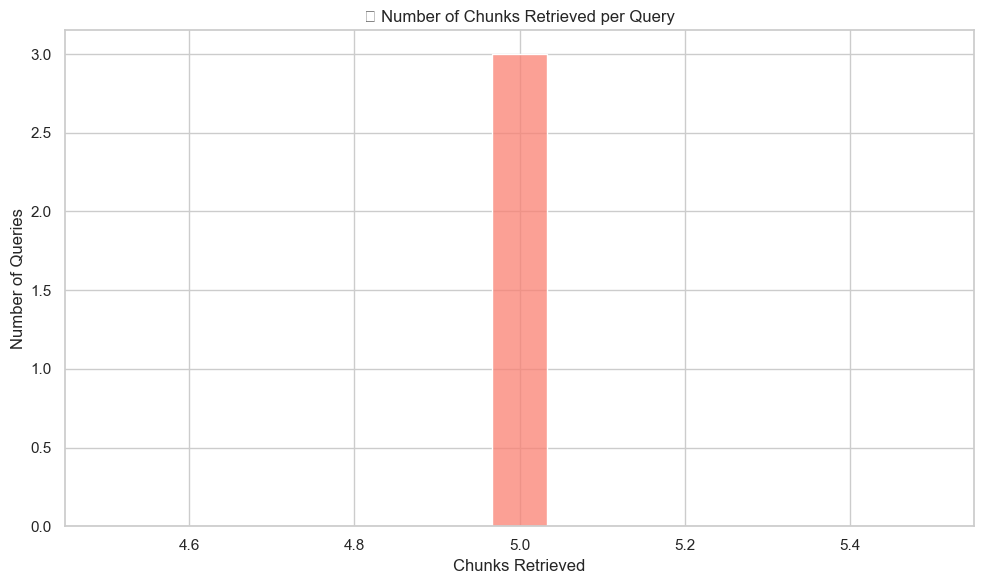

In [10]:
# Count how many chunks were returned per question
qa_df['num_chunks'] = qa_df['chunks'].apply(len)

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(qa_df['num_chunks'], bins=15, color='salmon')
plt.title("📥 Number of Chunks Retrieved per Query")
plt.xlabel("Chunks Retrieved")
plt.ylabel("Number of Queries")
plt.grid(True)
plt.tight_layout()
plt.show()


# Setence-Hybrid Embedding

In [11]:
# Load the chunk_analysis.json file
chunk_df = pd.read_json(CHUNK_ANALYSIS_PATH)
# Basic cleanup if needed
chunk_df['file_name'] = chunk_df['file_name'].astype(str)

# Display a preview of the data
chunk_df.head()


,file_name,file_type,source,chunk_id,num_tokens,truncated
0,2024-2025 Academic Calendar by Semester.pdf,.pdf,../data/raw/Department of Data Science\2024-20...,0,378,False
1,2024-2025 Academic Calendar by Semester.pdf,.pdf,../data/raw/Department of Data Science\2024-20...,1,478,False
2,2024-2025 Academic Calendar by Semester.pdf,.pdf,../data/raw/Department of Data Science\2024-20...,2,253,False
3,2024-2025 Academic Calendar by Semester.pdf,.pdf,../data/raw/Department of Data Science\2024-20...,3,489,False
4,2024-2025 Academic Calendar by Semester.pdf,.pdf,../data/raw/Department of Data Science\2024-20...,4,325,False


### Visualization: Token Count Distribution

C:\Users\chand\AppData\Local\Temp\ipykernel_27340\1292904802.py:8: UserWarning:

Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) Arial.

d:\#Code\VS Code\ASKME\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) Arial.



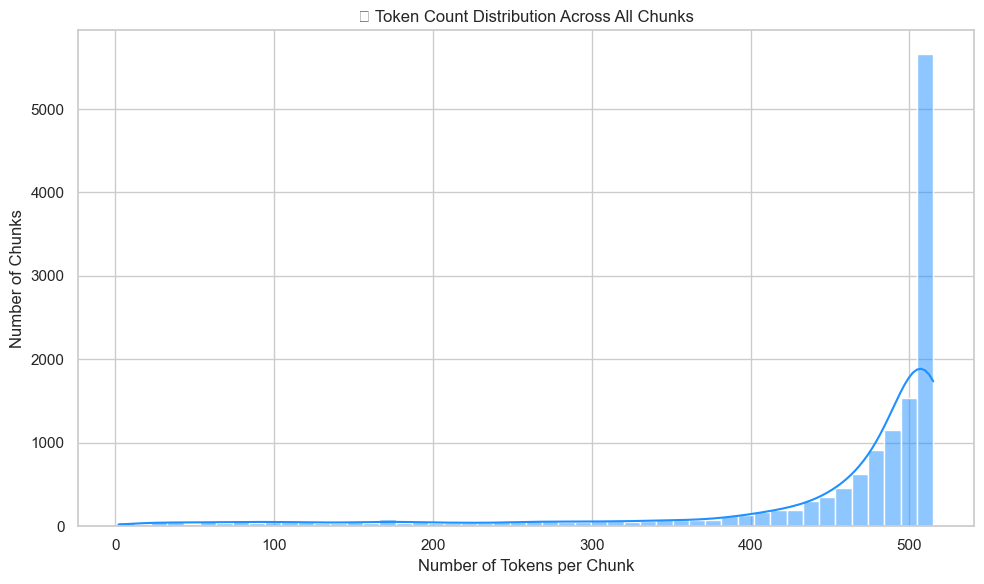

In [12]:
# Plot token count distribution
plt.figure(figsize=(10, 6))
sns.histplot(chunk_df['num_tokens'], bins=50, kde=True, color='dodgerblue')
plt.title("🧩 Token Count Distribution Across All Chunks")
plt.xlabel("Number of Tokens per Chunk")
plt.ylabel("Number of Chunks")
plt.grid(True)
plt.tight_layout()
plt.show()


### Chunk Count per File

C:\Users\chand\AppData\Local\Temp\ipykernel_27340\1184000906.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\chand\AppData\Local\Temp\ipykernel_27340\1184000906.py:14: UserWarning:

Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.

d:\#Code\VS Code\ASKME\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.



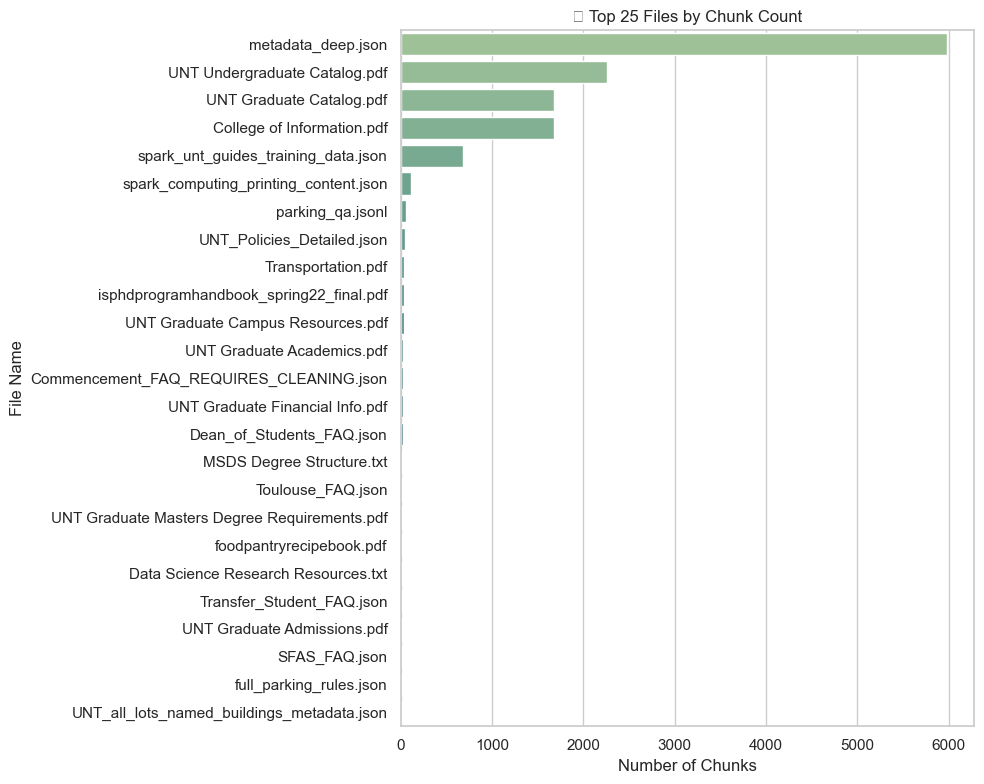

In [13]:
# Group by file_name to count how many chunks each file produced
chunk_counts = chunk_df['file_name'].value_counts().reset_index()
chunk_counts.columns = ['file_name', 'chunk_count']

# Sort and take top 25 for better readability
top_files = chunk_counts.sort_values(by='chunk_count', ascending=False).head(25)

# Horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(y='file_name', x='chunk_count', data=top_files, palette='crest')
plt.title("📦 Top 25 Files by Chunk Count")
plt.xlabel("Number of Chunks")
plt.ylabel("File Name")
plt.tight_layout()
plt.show()


In [14]:
# Compute summary statistics of chunk sizes (token counts)
summary_stats = chunk_df['num_tokens'].describe().to_frame().rename(columns={'num_tokens': 'Token Count Stats'})

# Add custom metrics
summary_stats.loc['range'] = summary_stats.loc['max'] - summary_stats.loc['min']
summary_stats.loc['mode'] = chunk_df['num_tokens'].mode().iloc[0]

summary_stats

,Token Count Stats
count,13737.000000
mean,450.853898
std,111.221817
min,2.000000
25%,455.000000
50%,497.000000
75%,513.000000
max,515.000000
range,513.000000
mode,514.000000


###  Analyze file type distribution

C:\Users\chand\AppData\Local\Temp\ipykernel_27340\3306650388.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\chand\AppData\Local\Temp\ipykernel_27340\3306650388.py:11: UserWarning:

Glyph 128193 (\N{FILE FOLDER}) missing from font(s) Arial.

d:\#Code\VS Code\ASKME\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128193 (\N{FILE FOLDER}) missing from font(s) Arial.



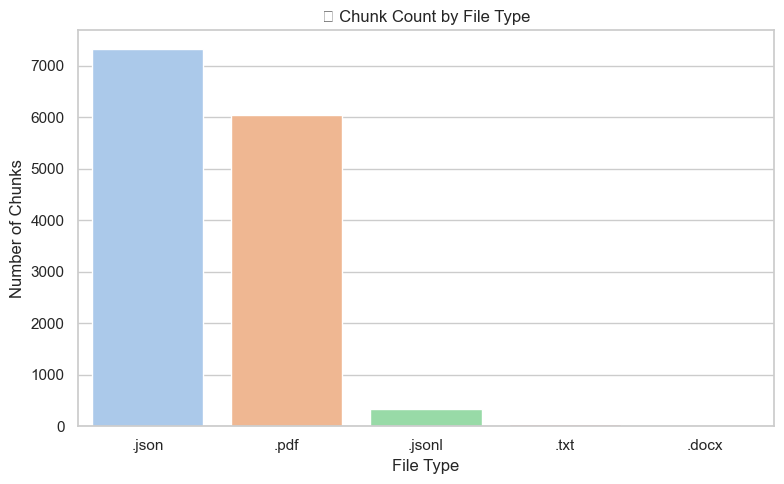

In [15]:
# Count chunk contributions by file type
file_type_counts = chunk_df['file_type'].value_counts().reset_index()
file_type_counts.columns = ['file_type', 'chunk_count']

# Plot as bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='file_type', y='chunk_count', data=file_type_counts, palette='pastel')
plt.title("📁 Chunk Count by File Type")
plt.xlabel("File Type")
plt.ylabel("Number of Chunks")
plt.tight_layout()
plt.show()


### Check truncation status

C:\Users\chand\AppData\Local\Temp\ipykernel_27340\358117966.py:9: UserWarning:

Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.

C:\Users\chand\AppData\Local\Temp\ipykernel_27340\358117966.py:9: UserWarning:

Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.

d:\#Code\VS Code\ASKME\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.

d:\#Code\VS Code\ASKME\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.



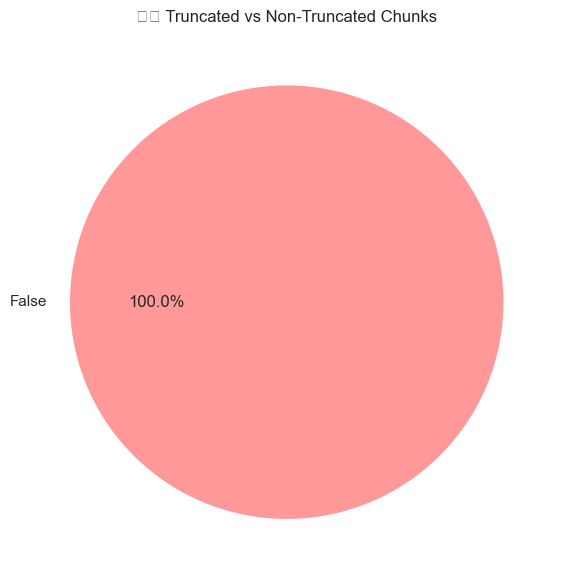

,truncated,count
0,False,13737


In [16]:
# Count how many chunks are truncated vs not
truncation_stats = chunk_df['truncated'].value_counts().reset_index()
truncation_stats.columns = ['truncated', 'count']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(truncation_stats['count'], labels=truncation_stats['truncated'], autopct='%1.1f%%', colors=['#ff9999','#8fd9b6'])
plt.title("⚠️ Truncated vs Non-Truncated Chunks")
plt.tight_layout()
plt.show()

# Also return raw numbers
truncation_stats


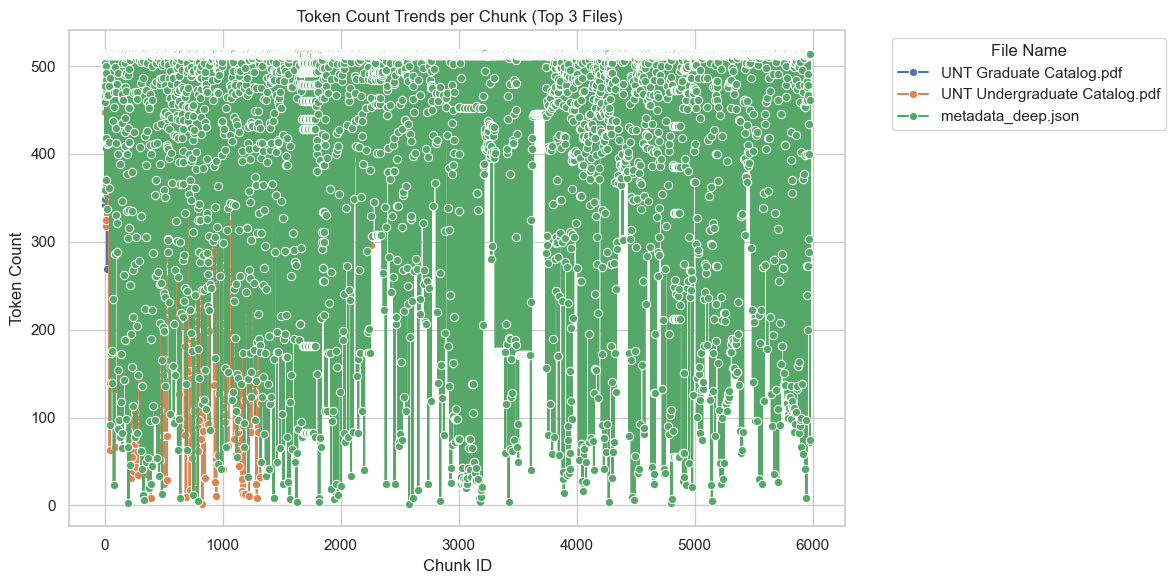

In [17]:
# Explore chunk token trends for top 3 files by chunk count
# Get top 3 files
top_3_files = chunk_df['file_name'].value_counts().head(3).index.tolist()

# Filter for top 3
filtered_df = chunk_df[chunk_df['file_name'].isin(top_3_files)]

# Plot token trend per file
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='chunk_id', y='num_tokens', hue='file_name', marker='o')
plt.title(" Token Count Trends per Chunk (Top 3 Files)")
plt.xlabel("Chunk ID")
plt.ylabel("Token Count")
plt.legend(title="File Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Summary dashboard

In [18]:
# Generate a final summary dashboard as a dataframe
summary = {
    "Total Chunks": len(chunk_df),
    "Unique Files": chunk_df['file_name'].nunique(),
    "Average Chunk Tokens": round(chunk_df['num_tokens'].mean(), 2),
    "Max Tokens": chunk_df['num_tokens'].max(),
    "Min Tokens": chunk_df['num_tokens'].min(),
    "Standard Deviation": round(chunk_df['num_tokens'].std(), 2),
    "Mode Tokens": chunk_df['num_tokens'].mode().iloc[0],
    "Truncated Chunks": chunk_df['truncated'].sum(),
    "Most Common File Type": chunk_df['file_type'].mode().iloc[0]
}

summary_df = pd.DataFrame(summary.items(), columns=["Metric", "Value"])
summary_df


,Metric,Value
0,Total Chunks,13737
1,Unique Files,372
2,Average Chunk Tokens,450.85
3,Max Tokens,515
4,Min Tokens,2
5,Standard Deviation,111.22
6,Mode Tokens,514
7,Truncated Chunks,0
8,Most Common File Type,.json


# Chunk Analysis for RecursiveCharacterTextSplitter 

In [19]:
# Generate a summary in the specified format for recursive chunking

recursive_df = pd.read_json(CHUNK_ANALYSIS_RECURSIVE_PATH)
summary = {
    "Total Chunks": len(recursive_df),
    "Unique Files": recursive_df['file_name'].nunique(),
    "Average Chunk Tokens": round(recursive_df['num_tokens'].mean(), 2),
    "Max Tokens": recursive_df['num_tokens'].max(),
    "Min Tokens": recursive_df['num_tokens'].min(),
    "Standard Deviation": round(recursive_df['num_tokens'].std(), 2),
    "Mode Tokens": recursive_df['num_tokens'].mode().iloc[0],
    "Truncated Chunks": recursive_df['truncated'].sum(),
    "Most Common File Type": recursive_df['file_type'].mode().iloc[0]
}

recursive_summary_df = pd.DataFrame(summary.items(), columns=["Metric", "Value"])
recursive_summary_df


,Metric,Value
0,Total Chunks,48495
1,Unique Files,373
2,Average Chunk Tokens,139.03
3,Max Tokens,381
4,Min Tokens,4
5,Standard Deviation,32.97
6,Mode Tokens,110
7,Truncated Chunks,0
8,Most Common File Type,.pdf


### Token Count Distribution

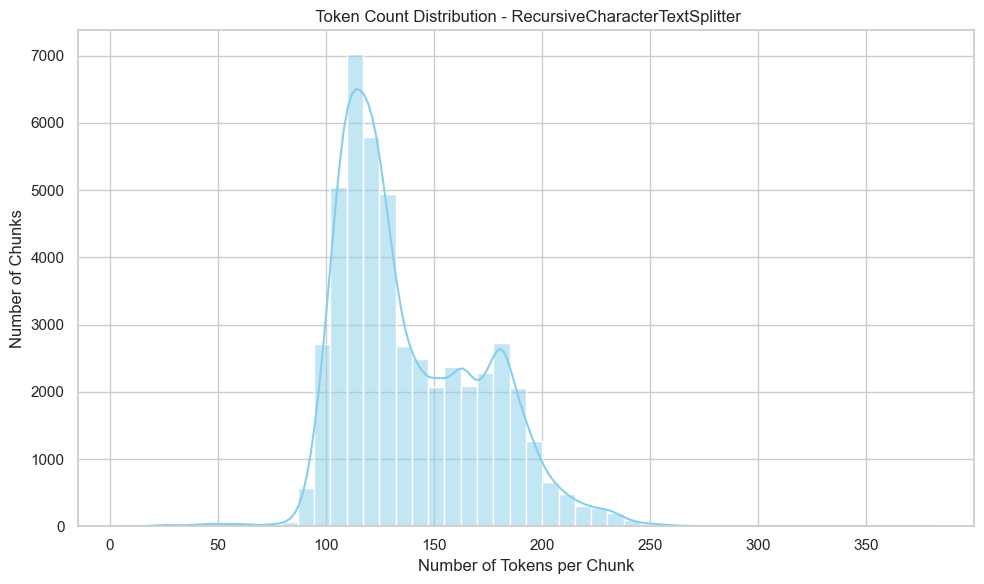

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Token Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(recursive_df['num_tokens'], bins=50, kde=True, color='skyblue')
plt.title(" Token Count Distribution - RecursiveCharacterTextSplitter")
plt.xlabel("Number of Tokens per Chunk")
plt.ylabel("Number of Chunks")
plt.grid(True)
plt.tight_layout()
plt.show()

### Chunk Count Per File

C:\Users\chand\AppData\Local\Temp\ipykernel_27340\3642123444.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\chand\AppData\Local\Temp\ipykernel_27340\3642123444.py:10: UserWarning:

Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.

d:\#Code\VS Code\ASKME\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.



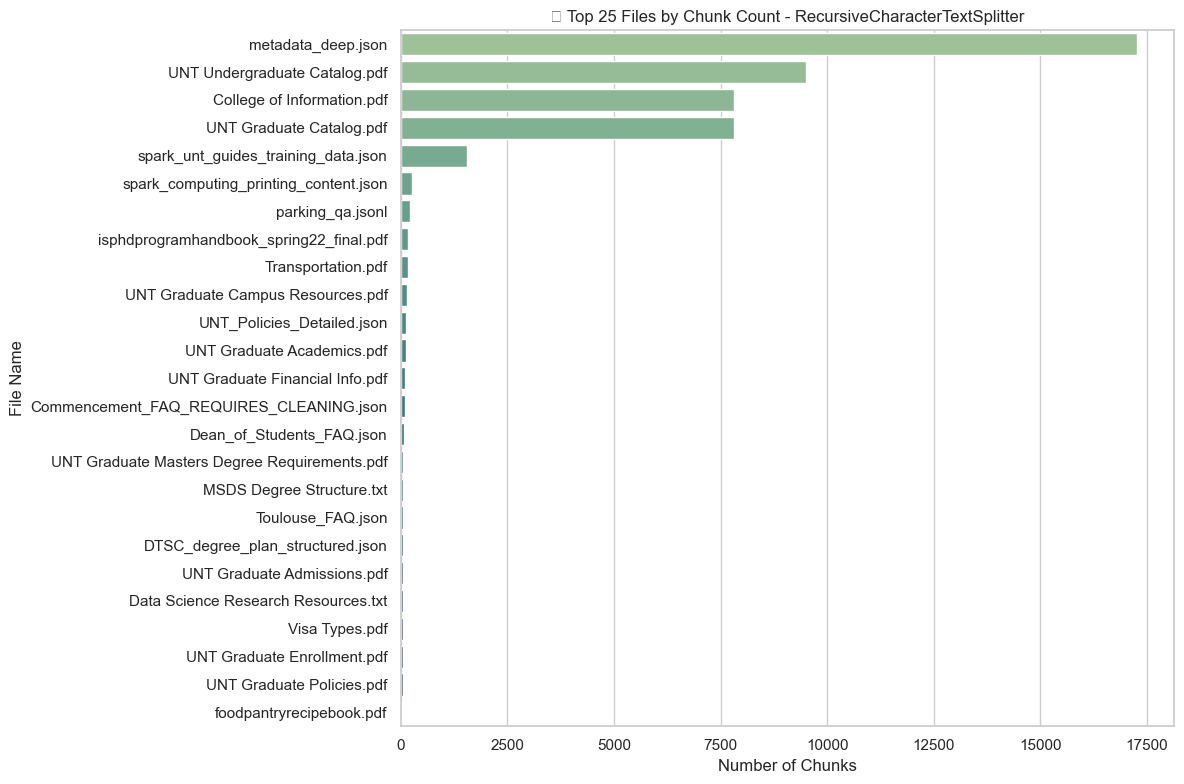

In [21]:
# Chunk Count Per File (Top 25)
top_files = recursive_df['file_name'].value_counts().reset_index().head(25)
top_files.columns = ['file_name', 'chunk_count']

plt.figure(figsize=(12, 8))
sns.barplot(y='file_name', x='chunk_count', data=top_files, palette='crest')
plt.title("📦 Top 25 Files by Chunk Count - RecursiveCharacterTextSplitter")
plt.xlabel("Number of Chunks")
plt.ylabel("File Name")
plt.tight_layout()
plt.show()


### File Type Distribution

C:\Users\chand\AppData\Local\Temp\ipykernel_27340\2378589803.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\chand\AppData\Local\Temp\ipykernel_27340\2378589803.py:10: UserWarning:

Glyph 128193 (\N{FILE FOLDER}) missing from font(s) Arial.

d:\#Code\VS Code\ASKME\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128193 (\N{FILE FOLDER}) missing from font(s) Arial.



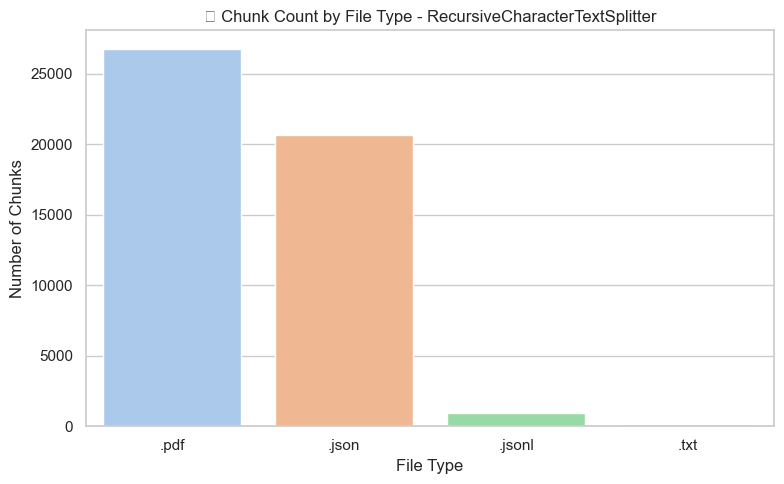

In [22]:
# File Type Distribution
file_type_counts = recursive_df['file_type'].value_counts().reset_index()
file_type_counts.columns = ['file_type', 'chunk_count']

plt.figure(figsize=(8, 5))
sns.barplot(x='file_type', y='chunk_count', data=file_type_counts, palette='pastel')
plt.title("📁 Chunk Count by File Type - RecursiveCharacterTextSplitter")
plt.xlabel("File Type")
plt.ylabel("Number of Chunks")
plt.tight_layout()
plt.show()

### Truncation Distribution

C:\Users\chand\AppData\Local\Temp\ipykernel_27340\4248963153.py:8: UserWarning:

Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.

C:\Users\chand\AppData\Local\Temp\ipykernel_27340\4248963153.py:8: UserWarning:

Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.

d:\#Code\VS Code\ASKME\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.

d:\#Code\VS Code\ASKME\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.



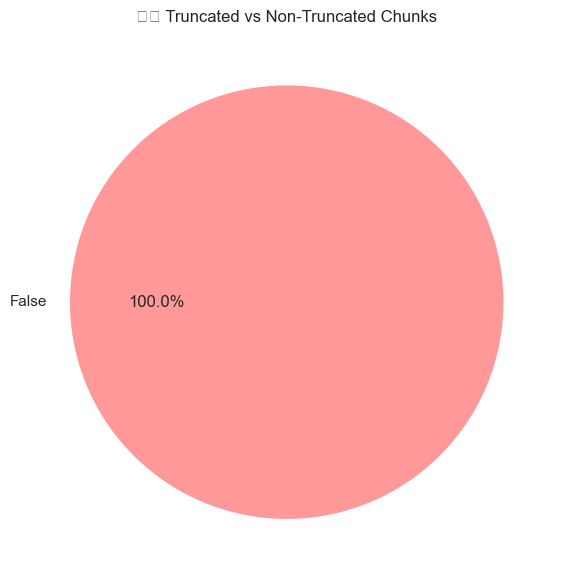

In [23]:
# Truncation Distribution
truncation_stats = recursive_df['truncated'].value_counts().reset_index()
truncation_stats.columns = ['truncated', 'count']

plt.figure(figsize=(6, 6))
plt.pie(truncation_stats['count'], labels=truncation_stats['truncated'], autopct='%1.1f%%', colors=['#ff9999','#8fd9b6'])
plt.title("⚠️ Truncated vs Non-Truncated Chunks")
plt.tight_layout()
plt.show()

 ### Token Length Deviation by File Type

C:\Users\chand\AppData\Local\Temp\ipykernel_27340\3000791460.py:19: UserWarning:

Glyph 128228 (\N{OUTBOX TRAY}) missing from font(s) Arial.

d:\#Code\VS Code\ASKME\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128228 (\N{OUTBOX TRAY}) missing from font(s) Arial.



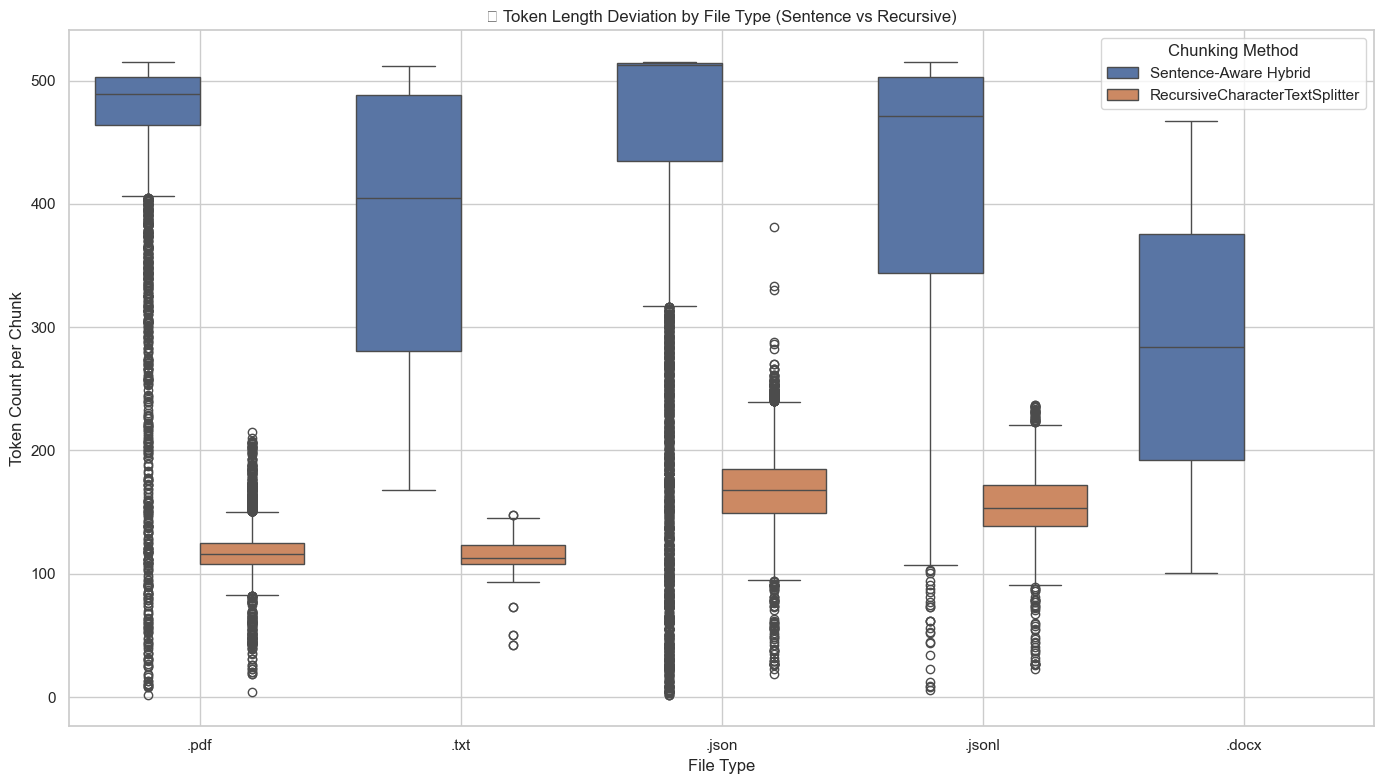

In [24]:
# Load both sentence-aware and recursive data for comparison
sentence_df = chunk_df

# Label each with a method column
sentence_df['method'] = 'Sentence-Aware Hybrid'
recursive_df['method'] = 'RecursiveCharacterTextSplitter'

# Concatenate both datasets
combined_df = pd.concat([sentence_df, recursive_df], ignore_index=True)

# Plot boxplot of token length grouped by file_type and method
plt.figure(figsize=(14, 8))
sns.boxplot(data=combined_df, x='file_type', y='num_tokens', hue='method')
plt.title("📤 Token Length Deviation by File Type (Sentence vs Recursive)")
plt.xlabel("File Type")
plt.ylabel("Token Count per Chunk")
plt.legend(title="Chunking Method")
plt.grid(True)
plt.tight_layout()
plt.show()


### Chunk Size Trends Within Each File

In [26]:
# Filter only truncated chunks
truncated_chunks = recursive_df[recursive_df['truncated'] == True]

# Count how many times each file has a truncated chunk
truncation_hotspots = truncated_chunks['file_name'].value_counts().reset_index()
truncation_hotspots.columns = ['file_name', 'truncated_chunk_count']

# Proceed only if truncations exist
if not truncation_hotspots.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(y='file_name', x='truncated_chunk_count', data=truncation_hotspots.head(25), palette='rocket')
    plt.title("⚠️ Top Files with Most Truncated Chunks")
    plt.xlabel("Number of Truncated Chunks")
    plt.ylabel("File Name")
    plt.tight_layout()
    plt.show()
else:
    truncation_result = " No truncated chunks detected in RecursiveCharacterTextSplitter results."

truncation_hotspots if not truncation_hotspots.empty else truncation_result


' No truncated chunks detected in RecursiveCharacterTextSplitter results.'